<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Construcción y Comparación de Modelos de Clasificación

El objetivo de esta práctica es construir múltiples modelos de clasificación para predecir la probabilidad de que una transacción sea fraudulenta. Además de implementar los modelos, deberás analizar y comparar las métricas obtenidas para seleccionar el modelo que mejor se ajuste al problema. En este laboratorio deberás: 



- Entrenar al menos tres modelos diferentes de clasificación, como:

   - **Regresión logística**

   - **Árboles de decisión**

   - **Bosques aleatorios**

   - etc.


- Obtener las siguientes métricas para cada modelo:

   - Precisión

   - Recall (Sensibilidad)

   - F1-Score

   - Área bajo la curva ROC (AUC-ROC)

   - Matriz de confusión

   - Accuracy

- Visualizar y comparar estas métricas en gráficos claros y explicativos.


- Analizar las métricas de rendimiento de cada modelo.

- Justificar la selección del modelo más adecuado en función del equilibrio entre precisión y recall, así como la interpretación del área bajo la curva ROC.


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Otros objetivos
# -----------------------------------------------------------------------
import sys
import os

# Ruta relativa desde notebooks/1-Preprocesing/ a src/
src_path = "../src/"
sys.path.append(src_path)

import support_comparison as sp  
import pickle

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df=pd.read_csv("../results/data_encoded.csv")

In [3]:
x=df.drop("is_fraudulent",axis=1)
y=df[["is_fraudulent"]]
x_train, x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [4]:
with open('../models/mejor_modelo_logistic_regression.pkl', 'rb') as f:
        modelo_logistic_regression = pickle.load(f)
y_test_pred_modelo_logistic_regression=modelo_logistic_regression.predict(x_test)
y_train_pred_modelo_logistic_regression=modelo_logistic_regression.predict(x_train)
metricas_modelo_logistic_regression=sp.metricas(y_train, y_train_pred_modelo_logistic_regression, y_test, y_test_pred_modelo_logistic_regression)
metricas_modelo_logistic_regression

,train,test
accuracy,0.505195,0.513013
precision,0.255222,0.263182
recall,0.505195,0.513013
f1,0.339121,0.347892
kappa,0.000000,0.000000


In [5]:
with open('../models/mejor_modelo_tree.pkl', 'rb') as f:
        modelo_tree = pickle.load(f)
y_test_pred_modelo_tree=modelo_tree.predict(x_test)
y_train_pred_modelo_tree=modelo_tree.predict(x_train)
metricas_modelo_tree=sp.metricas(y_train, y_train_pred_modelo_tree, y_test, y_test_pred_modelo_tree)
metricas_modelo_tree

,train,test
accuracy,0.521467,0.500000
precision,0.542133,0.477189
recall,0.521467,0.500000
f1,0.438659,0.414244
kappa,0.035250,-0.020227


In [6]:
with open('../models/mejor_modelo_random_forest.pkl', 'rb') as f:
        modelo_random_forest = pickle.load(f)
y_test_pred_modelo_random_forest=modelo_random_forest.predict(x_test)
y_train_pred_modelo_random_forest=modelo_random_forest.predict(x_train)
metricas_modelo_random_forest=sp.metricas(y_train, y_train_pred_modelo_random_forest, y_test, y_test_pred_modelo_random_forest)
metricas_modelo_random_forest

,train,test
accuracy,0.762924,0.512513
precision,0.763277,0.512387
recall,0.762924,0.512513
f1,0.762770,0.512437
kappa,0.525592,0.024110


In [7]:
with open('../models/mejor_modelo_gradient_boosting.pkl', 'rb') as f:
        modelo_gradient_boosting = pickle.load(f)
y_test_pred_modelo_gradient_boosting=modelo_gradient_boosting.predict(x_test)
y_train_pred_modelo_gradient_boosting=modelo_gradient_boosting.predict(x_train)
metricas_modelo_gradient_boosting=sp.metricas(y_train, y_train_pred_modelo_gradient_boosting, y_test, y_test_pred_modelo_gradient_boosting)
metricas_modelo_gradient_boosting

,train,test
accuracy,0.723870,0.528028
precision,0.723971,0.527991
recall,0.723870,0.528028
f1,0.723773,0.528009
kappa,0.447517,0.055342


In [8]:
with open('../models/mejor_modelo_xgboost.pkl', 'rb') as f:
        modelo_xgboost = pickle.load(f)
y_test_pred_modelo_xgboost=modelo_xgboost.predict(x_test)
y_train_pred_modelo_xgboost=modelo_xgboost.predict(x_train)
metricas_modelo_xgboost=sp.metricas(y_train, y_train_pred_modelo_xgboost, y_test, y_test_pred_modelo_xgboost)
metricas_modelo_xgboost

,train,test
accuracy,0.646514,0.500501
precision,0.646852,0.500318
recall,0.646514,0.500501
f1,0.646059,0.500385
kappa,0.292495,-0.000041


In [9]:
lista_nombres_modelos=["modelo_logistic_regression","modelo_tree","modelo_random_forest","modelo_gradient_boosting","modelo_xgboost"]

In [10]:
sp.combinar_metricas(lista_nombres_modelos,metricas_modelo_logistic_regression, metricas_modelo_tree, metricas_modelo_random_forest, metricas_modelo_gradient_boosting, metricas_modelo_xgboost)

,accuracy,precision,recall,f1,kappa,Modelo
train,0.505195,0.255222,0.505195,0.339121,0.000000,modelo_logistic_regression
test,0.513013,0.263182,0.513013,0.347892,0.000000,modelo_logistic_regression
train,0.521467,0.542133,0.521467,0.438659,0.035250,modelo_tree
test,0.500000,0.477189,0.500000,0.414244,-0.020227,modelo_tree
train,0.762924,0.763277,0.762924,0.762770,0.525592,modelo_random_forest
test,0.512513,0.512387,0.512513,0.512437,0.024110,modelo_random_forest
train,0.723870,0.723971,0.723870,0.723773,0.447517,modelo_gradient_boosting
test,0.528028,0.527991,0.528028,0.528009,0.055342,modelo_gradient_boosting
train,0.646514,0.646852,0.646514,0.646059,0.292495,modelo_xgboost
test,0.500501,0.500318,0.500501,0.500385,-0.000041,modelo_xgboost


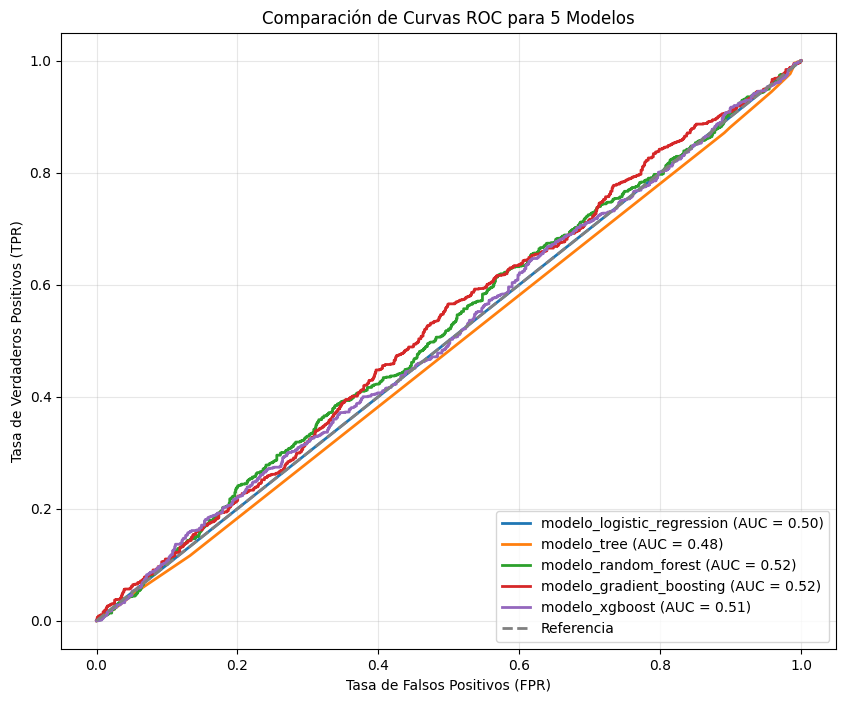

In [11]:
lista_modelos=[modelo_logistic_regression,modelo_tree,modelo_random_forest,modelo_gradient_boosting,modelo_xgboost]
sp.comparador_curvas_auc(lista_modelos, x_test, y_test, lista_nombres_modelos)

C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *ar

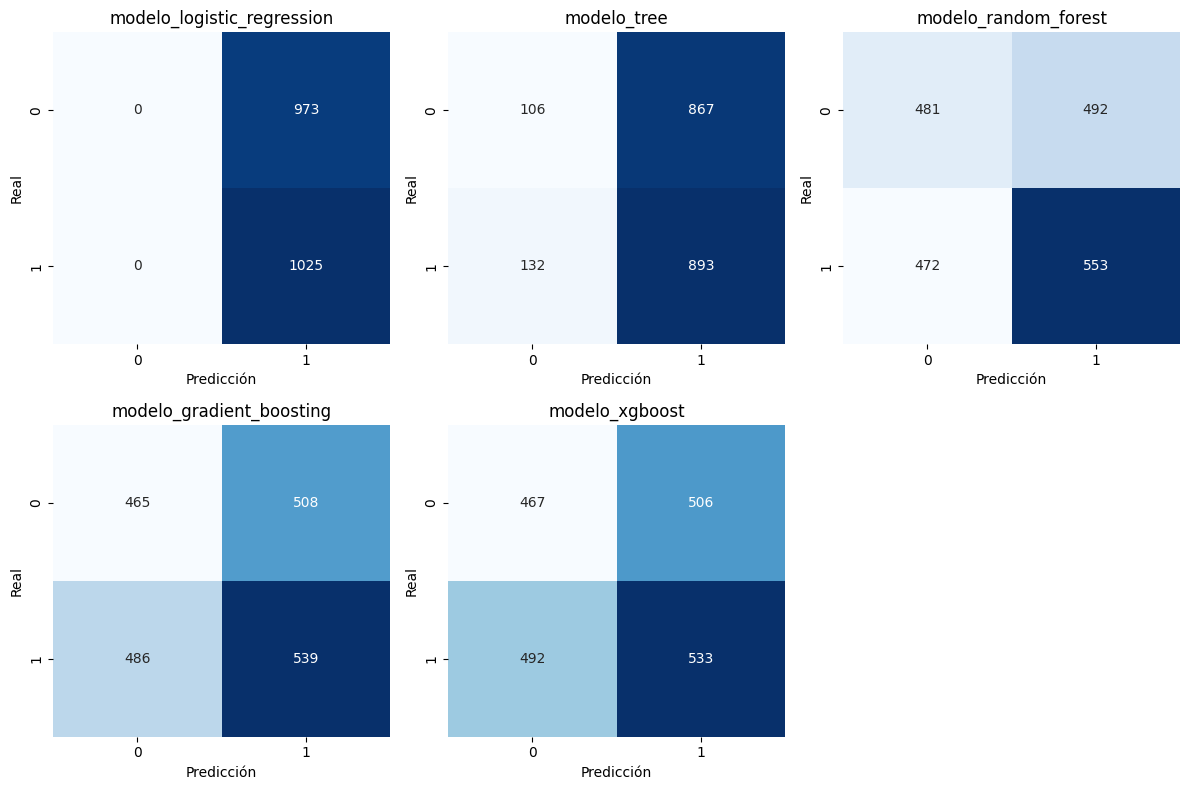

In [12]:
sp.comparar_matrices_confusion(x_train, y_train, x_test, y_test, lista_modelos, lista_nombres_modelos, figsize=(12, 8))